In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [24]:
store_df=pd.read_csv('./store.csv')
train_df=pd.read_csv('./train.csv')
merged_df= store_df.merge(train_df,on='Store',how='right')  

C:\Users\ruvan\AppData\Local\Temp\ipykernel_29152\4269266380.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('./train.csv')


In [25]:
merged_df=merged_df[merged_df['Open']!=0]
merged_df=merged_df.drop(columns='Open',axis=1)
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [26]:
merged_df['Year']=merged_df.Date.dt.year
merged_df['Month']=merged_df.Date.dt.month
merged_df['Day']=merged_df.Date.dt.day
cols=list(merged_df.columns)


In [27]:
merged_df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
dtype: int64

Text(0.5, 1.0, 'Barplot based on whether there is promotion or not')

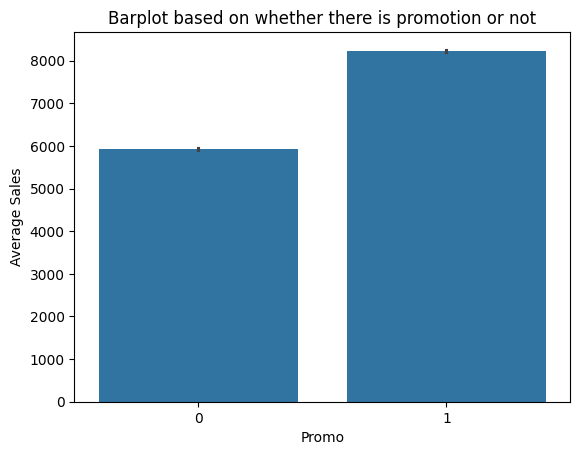

In [7]:
temp_df=merged_df.sample(100000,random_state=42)
promo_plot=sns.barplot(temp_df,x='Promo',y='Sales')
promo_plot.set_ylabel("Average Sales")
promo_plot.set_title("Barplot based on whether there is promotion or not")


Text(0.5, 1.0, 'Barplot based on Store Type')

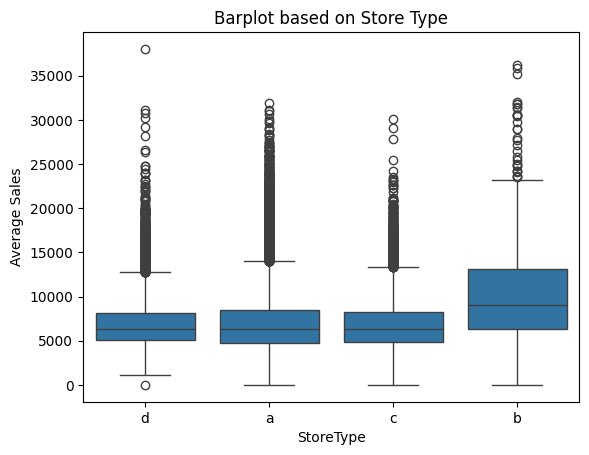

In [8]:

storetype_plot=sns.boxplot(temp_df,x='StoreType',y='Sales')
storetype_plot.set_ylabel("Average Sales")
storetype_plot.set_title("Barplot based on Store Type")

In [22]:
merged_df.StateHoliday.value_counts()

StateHoliday
0    731342
0    112140
a       694
b       145
c        71
Name: count, dtype: int64

C:\Users\ruvan\AppData\Local\Temp\ipykernel_25240\4055184800.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  stateholiday_plot.set_xticklabels(['None','Public','Easter','Christmas'])


[Text(0, 0, 'None'),
 Text(1, 0, 'Public'),
 Text(2, 0, 'Easter'),
 Text(3, 0, 'Christmas')]

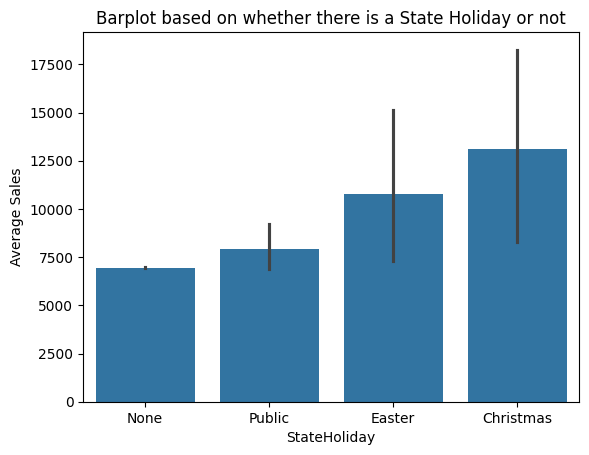

In [10]:
stateholiday_plot=sns.barplot(temp_df,x='StateHoliday',y='Sales')
stateholiday_plot.set_ylabel("Average Sales")
stateholiday_plot.set_title("Barplot based on whether there is a State Holiday or not")
stateholiday_plot.set_xticklabels(['None','Public','Easter','Christmas'])

Text(0.5, 1.0, 'Barplot based on whether there is a School Holiday or not')

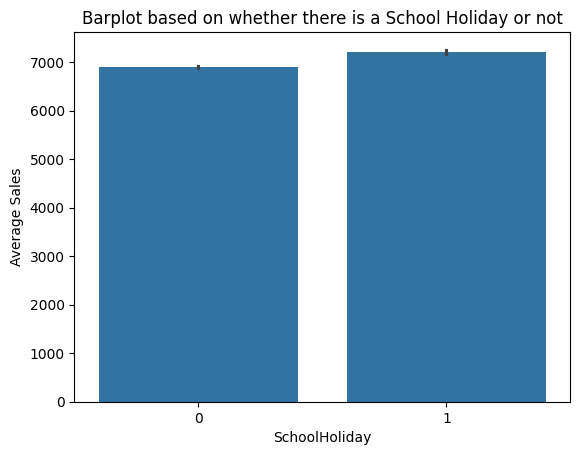

In [11]:
schoolholiday_plot=sns.barplot(temp_df,x='SchoolHoliday',y='Sales')
schoolholiday_plot.set_ylabel("Average Sales")
schoolholiday_plot.set_title("Barplot based on whether there is a School Holiday or not")

Text(0.5, 1.0, 'Barplot based on Assortment type')

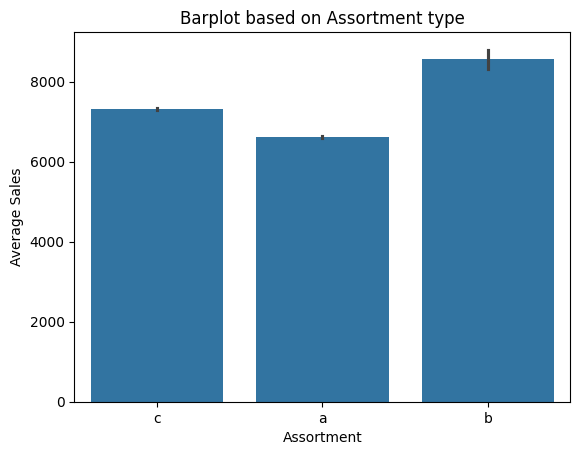

In [12]:
assortment_plot=sns.barplot(temp_df,x='Assortment',y='Sales')
assortment_plot.set_ylabel("Average Sales")
assortment_plot.set_title("Barplot based on Assortment type")

Text(0.5, 1.0, 'Barplot based on Day of Week')

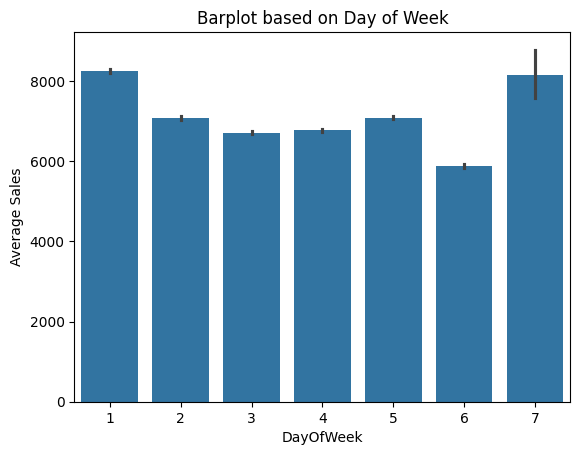

In [13]:
DayofWeek_plot=sns.barplot(temp_df,x='DayOfWeek',y='Sales')
DayofWeek_plot.set_ylabel("Average Sales")
DayofWeek_plot.set_title("Barplot based on Day of Week")

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

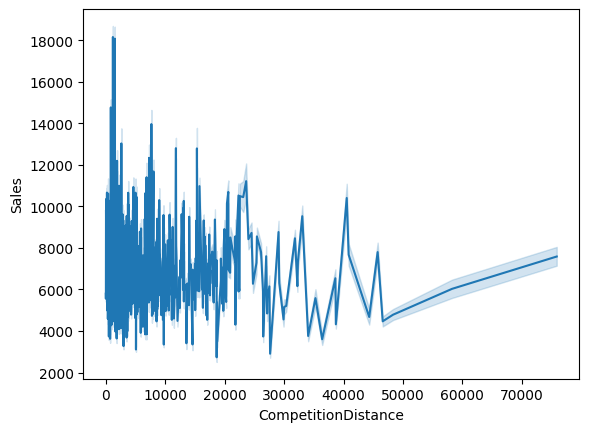

In [14]:
sns.lineplot(temp_df,x='CompetitionDistance',y='Sales')

In [28]:
med_dist = merged_df['CompetitionDistance'].median()
merged_df['CompetitionDistance']=merged_df['CompetitionDistance'].fillna(med_dist)


In [29]:
merged_df['CompetitionOpenSinceYear']=merged_df['CompetitionOpenSinceYear'].fillna(merged_df['Year'])
merged_df['CompetitionOpenSinceMonth']=merged_df['CompetitionOpenSinceMonth'].fillna(merged_df['Month'])

merged_df['CompetitionOpenSince'] = (merged_df['Year']-merged_df['CompetitionOpenSinceYear'])*12+(merged_df['Month']-merged_df['CompetitionOpenSinceMonth'])
merged_df['CompetitionOpenSince']=merged_df['CompetitionOpenSince'].apply(lambda x: x if x>0 else 0)


In [30]:
# If competition is too far away (imputed), ignore
valid_competition = merged_df[merged_df['CompetitionDistance'] < merged_df['CompetitionDistance'].quantile(0.99)]

# Focus on first year of competition
valid_competition['CompetitionOpenBucket'] = valid_competition['CompetitionOpenSince'].apply(lambda x: x if x <= 12 else 12  )


C:\Users\ruvan\AppData\Local\Temp\ipykernel_29152\1629079795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_competition['CompetitionOpenBucket'] = valid_competition['CompetitionOpenSince'].apply(lambda x: x if x <= 12 else 12  )


In [31]:
def competition_stage(months):
    if months <= 3:
        return "0–3 months"
    elif months <= 6:
        return "4–6 months"
    elif months <= 12:
        return "7–12 months"
    else:
        return ">12 months"

valid_competition['CompetitionStage'] = valid_competition['CompetitionOpenSince'].apply(competition_stage)



C:\Users\ruvan\AppData\Local\Temp\ipykernel_29152\1907805100.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_competition['CompetitionStage'] = valid_competition['CompetitionOpenSince'].apply(competition_stage)


C:\Users\ruvan\AppData\Local\Temp\ipykernel_29152\1200821419.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=valid_competition, x='CompetitionStage', y='Sales', estimator='mean', ci=95)


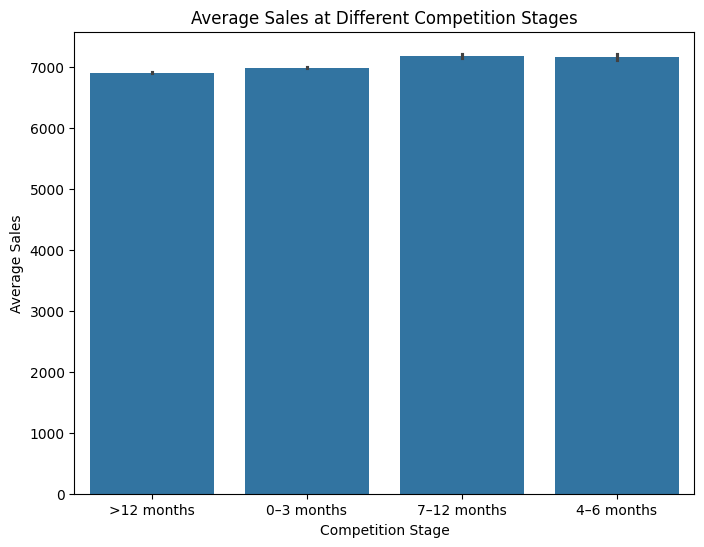

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=valid_competition, x='CompetitionStage', y='Sales', estimator='mean', ci=95)
plt.title("Average Sales at Different Competition Stages")
plt.xlabel("Competition Stage")
plt.ylabel("Average Sales")
plt.show()


In [33]:
merged_df['Promo2SinceWeek']=merged_df['Promo2SinceWeek'].fillna(0)
merged_df['Promo2SinceYear']=merged_df['Promo2SinceYear'].fillna(0)
merged_df['PromoInterval']=merged_df['PromoInterval'].fillna(0)

In [34]:
merged_df['Store']=merged_df['Store'].map(merged_df.groupby('Store')['Sales'].mean())


In [35]:
target_cols=['Sales']
input_cols=['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo', 'StateHoliday', 'SchoolHoliday', 'DayOfWeek', 'Year', 'Month', 'Day', 'CompetitionOpenSince', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [36]:
train_df=merged_df[merged_df['Date']<="2015-05-31"]
val_df=merged_df[(merged_df['Date']<="2015-06-30") & (merged_df['Date']>"2015-05-31")]
test_df=merged_df[merged_df['Date']>"2015-06-30"]

In [37]:
train_df=train_df.copy()
val_df=val_df.copy()
test_df=test_df.copy()

In [38]:

avg_sales=train_df.groupby('Store')['Sales'].mean()
def store_avg_sales(df):
    return df['Store'].map(avg_sales)
train_df['sales_pred']=store_avg_sales(train_df)
val_df['sales_pred']=store_avg_sales(val_df)
test_df['sales_pred']=store_avg_sales(test_df)

print("RMSE of training dataset ",root_mean_squared_error(train_df['sales_pred'],train_df['Sales']))
print("RMSE of validation dataset ",root_mean_squared_error(val_df['sales_pred'],val_df['Sales']))
print("RMSE of test dataset ",root_mean_squared_error(test_df['sales_pred'],test_df['Sales']))

RMSE of training dataset  1957.6067285072904
RMSE of validation dataset  2205.5202719243725
RMSE of test dataset  1740.1523045840597


In [39]:
numerical_cols=['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo', 'SchoolHoliday', 'DayOfWeek', 'Year', 'Month', 'Day', 'CompetitionOpenSince', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
categorical_cols=['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
train_df[categorical_cols] = train_df[categorical_cols].astype(str)
val_df[categorical_cols] = val_df[categorical_cols].astype(str)
test_df[categorical_cols] = test_df[categorical_cols].astype(str)
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore").fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols])
val_df[encoded_cols]=encoder.transform(val_df[categorical_cols])
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols])

In [40]:
X_train=train_df[numerical_cols+encoded_cols]
X_val=val_df[numerical_cols+encoded_cols]
X_test=test_df[numerical_cols+encoded_cols]
train_output=train_df['Sales']
val_output=val_df['Sales']
test_output=test_df['Sales']

In [41]:
model=xgb.XGBRegressor(random_state=42,max_depth=10,n_estimators=100).fit(X_train,train_output)

In [20]:
val_preds=model.predict(X_val)
test_preds=model.predict(X_test)
print(root_mean_squared_error(val_preds,val_output))
print(root_mean_squared_error(test_preds,test_output))

1088.0745849609375
1032.062255859375
